## Cifar 10 Convolutional Neural Network Implementation

In [2]:
# Pytorch Imports #
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler

# Torchvision Imports #
import torchvision.datasets as datasets
import torchvision.transforms as T

### Install and Import Captum

In [3]:
!pip install captum Flask-Compress -q

### Install and Import Watermark

In [4]:
# Library installaation using pip for Watermark#
!pip install watermark -q

# Watermark #
from watermark import watermark

### Import Libraries needed for Google Drive mount

In [3]:
# Library installaation using pip for linux backend of colab#
!pip install -U -q PyDrive

# Import of Libraries from Drive using google collab api #
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import drive
from google.colab import auth

from oauth2client.client import GoogleCredentials

### <u>Function used to Download data from Drive</u> :

In [4]:
# Function for downloading especific Data from the Drive folders #
def download_Data(file_list, string_Discriminator):
  # Check inside the folder if is already downlaoded #
  downloaded = []

  for path in os.scandir("/content/"):
    downloaded.append(path.name)

  # Iterate through the files and download them to the data folder if not already downloaded, and are of the givne extension type#
  for files in file_list:
    if (string_Discriminator in files['title']) & (files['title'] not in downloaded):
      print('title: %s, id: %s' % (files['title'], files['id']))
      fname = os.path.join(local_download_path, files['title'])
      print('downloading to {}'.format(fname))
      f_ = drive.CreateFile({'id': files['id']})
      f_.GetContentFile(fname)
      downloaded.append(fname)

### Import Files from Drive

In [5]:
from google.colab import drive

#Authentication and creation the PyDrive client.
auth.authenticate_user()   #See if credentials are valid
gauth = GoogleAuth()       #Start the authentication of the collab
gauth.credentials = GoogleCredentials.get_application_default()
drive.mount("/content/gdrive")  #Mounts drive in the collab to save the important data
drive = GoogleDrive(gauth) #Finishes the authentication

#Choose a local directory inside the colab to import the data.
local_download_path = os.path.expanduser('/content')

# Try to make the directories in the colab #
try:
  os.makedirs(local_download_path)
except: pass

#Iterate through items using the query syntax for google drive
#https://developers.google.com/drive/v2/web/search-parameters

# Create a file list based on the query syntax searching in our drive folder and download it#
file_list = drive.ListFile(
    {'q': "'1i3s7sRq6gPJHGJBlpeEABJI4TaExXI5Q' in parents"}).GetList()

# Download only files from these types from Drive folder 1sqEm5Pvxcg2X2yF2jkZKoojJmSXpysXe #
download_Data(file_list,".py")
download_Data(file_list,".pt")

Mounted at /content/gdrive
title: matPlotLib_Helpers.py, id: 1R-jr2OJ_gqJcGRxoHi5otnM-BgDqHhq4
downloading to /content/matPlotLib_Helpers.py
title: dataset_Helpers.py, id: 1TgiNFjxcrItGtO2_u_eJrzPtMYCgOB_b
downloading to /content/dataset_Helpers.py
title: general_Helpers.py, id: 1dDFRfIFM6y86qMuYGU4bihnKT098te3k
downloading to /content/general_Helpers.py
title: models_Helpers.py, id: 1kBjcBOh9EdiSVSTrxZu2hmJb_IxUQqBm
downloading to /content/models_Helpers.py
title: models.py, id: 1mEq-QqFsMQiUhYVSM73HXoLfCZ8ZB8oB
downloading to /content/models.py
title: custom_net.pt, id: 1EUj3FodB5qhtaAJeP0AxWQYLvDRwR7XS
downloading to /content/custom_net.pt
title: optimizer_custom_net.pt, id: 1D8Td1LQM5wwIqA7muXmuc9-oYEW4cm3e
downloading to /content/optimizer_custom_net.pt
title: optimizeralexNet.pt, id: 1-1ePUX85jiw-itff7z55bcaNjdondDes
downloading to /content/optimizeralexNet.pt
title: alexNet.pt, id: 1VVr3f-WbYlSf49v1g7shpsD9g8E5UPoi
downloading to /content/alexNet.pt
title: alexNet.pt, id: 1-1UoM

### Import User Functions

In [5]:
# User files Imports #
from dataset_Helpers import *
from general_Helpers import *
from matPlotLib_Helpers import *
from models_Helpers import *
from models import *

## Cuda Verification

In [6]:
device = Get_available_devices()

NVIDIA GeForce GTX 1660 Ti


### Set initial Seed for Neural Network
Allows us to shuffle the model in the same way if we want to get the same initial weights with a Re-Run

In [7]:
Set_all_seeds(0)

### Configure Dataset

In [8]:
# Dataset Configuration #
MINIBATCH_SIZE = 64
DOWNLOAD = True
LOG = True

# Dataset Transformation Tensor using CIFAR 10 Normalized standar #
transform_cifar = T.Compose([T.ToTensor(),
                             T.Resize((70, 70)),
                             T.RandomCrop((64, 64)),
                             T.RandomErasing(0.05,(0.05,0.1),value="random"),
                             #T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
                             ])

train_data_loader, validation_data_loader, test_data_loader = Cifar10_dataset_Generator(transform_cifar,MINIBATCH_SIZE,DOWNLOAD,LOG)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./Cifar10_Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(70, 70), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(64, 64), padding=None)
               RandomErasing(p=0.05, scale=(0.05, 0.1), ratio=(0.3, 3.3), value=random, inplace=False)
           )


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./Cifar10_Data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(70, 70), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(64, 64), padding=None)
               RandomErasing(p=0.05, scale=(0.05, 0.1), ratio=(0.3, 3.3), value=random, inplace=False)
           )


Dataset CIFAR10
    Num

### Verification of Dataloaders

In [9]:
Verify_data(train_data_loader.dataset, validation_data_loader.dataset, test_data_loader.dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./Cifar10_Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(70, 70), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(64, 64), padding=None)
               RandomErasing(p=0.05, scale=(0.05, 0.1), ratio=(0.3, 3.3), value=random, inplace=False)
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./Cifar10_Data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(70, 70), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(64, 64), padding=None)
               RandomErasing(p=0.05, scale=(0.05, 0.1), ratio=(0.3, 3.3), value=random, inplace=False)
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./Cifar10_Data
    Split: Test
    StandardTransform
Transform: Compose(
 

### Show Single Image

The image Class is: cat


C:\Users\oswy2\Documents\Redes_Neuronales\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


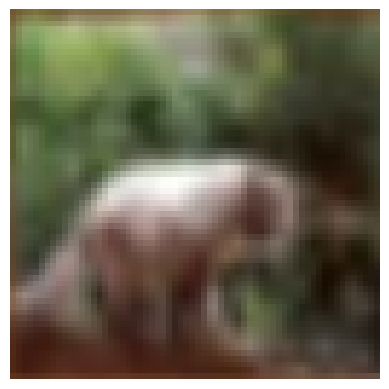

In [10]:
Plot_figure(train_data_loader)

### Show Multiple Images

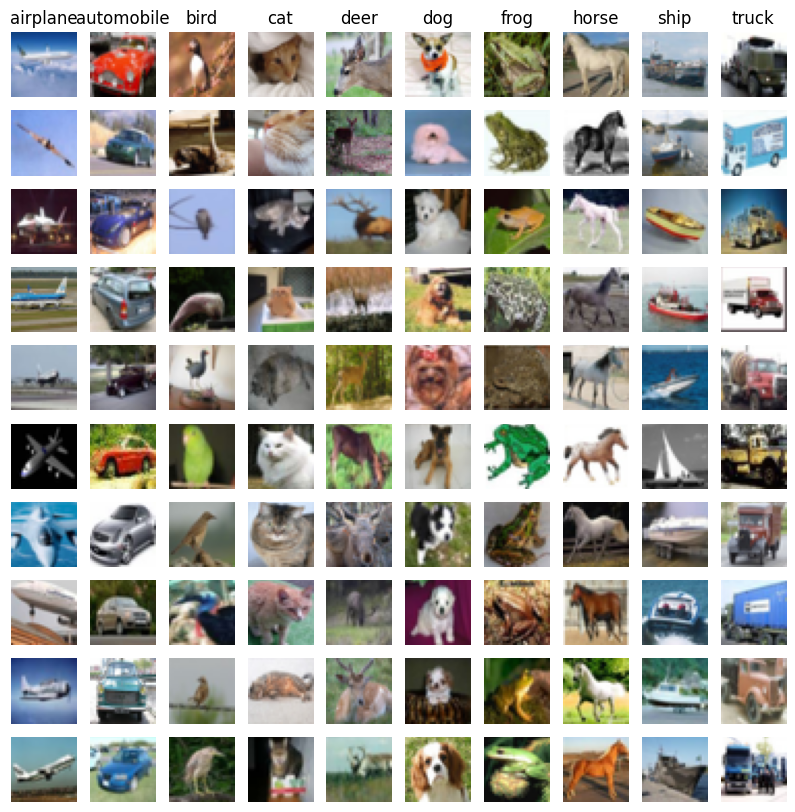

In [11]:
Plot_figures_grid(train_data_loader)

### AlexNet Paper Model

References

[1] Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." In Advances in Neural Information Processing Systems, pp. 1097-1105. 2012.

### Neural Network AlexNet Model Implementation

In [13]:
# Testing or Training Selector #
TEST = True

# Hyperparameters Definitions
LEARNING_RATE = 0.0001
NUM_EPOCHS = 20

# Architecture
NUM_CLASSES = 10

# Model extension save
Model_NAME = "alexNet.pt"

# Create model using AlexNet class
alexNet_model = CNN_AlexNet(NUM_CLASSES)

if(TEST):
        Load_model(alexNet_model,Model_NAME)
        alexNet_model.to(device)
else:
    # Send Device to GPU  if available
    alexNet_model.to(device)

    # Optimizer implementation - Adam
    optimizer = torch.optim.Adam(alexNet_model.parameters(), lr=LEARNING_RATE)

### Training of Network

In [14]:
if not TEST:
    logger = Train_CNN(NUM_EPOCHS,alexNet_model,optimizer,device,train_data_loader,validation_data_loader)

### Save Network Model in drive

In [15]:
if not TEST:
    Save_model(alexNet_model,"/content/gdrive/MyDrive/CNN_Tareas/" + Model_NAME)
    Save_model(optimizer,"/content/gdrive/MyDrive/CNN_Tareas/optimizer" + Model_NAME)

### Evaluation of Model

In [16]:
if not TEST:
    Plot_minibatch_loss(logger,"train_loss_batch")

In [17]:
if not TEST:
    Plot_accuracy_epochs(logger,NUM_EPOCHS,["train_accuracy_epoch","validation_accuracy_epoch"])

In [18]:
Compute_total_accuracy(alexNet_model,train_data_loader,validation_data_loader,test_data_loader,device)

Train ACC: 78.07%
Validation ACC: 66.98%
Test ACC: 65.50%


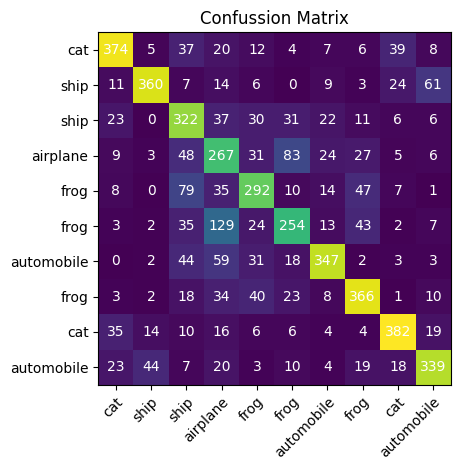

In [19]:
matrix, labels =  Compute_confusion_matrix(alexNet_model,test_data_loader,device)
Plot_confusion_matrix(matrix,labels,"Confussion Matrix")

### Neural Network Custom Model Implementation

In [10]:
# Testing or Training Selector #
TEST = True

# Hyperparameters Definitions
LEARNING_RATE = 0.00035
NUM_EPOCHS = 10

# Architecture
NUM_CLASSES = 10

# Model extension save
Model_NAME = "custom_net.pt"

# Create model using AlexNet class
custom_model = CNN_custom(NUM_CLASSES)

if(TEST):
        Load_model(custom_model,Model_NAME)
        custom_model.to(device)
else:
    # Send Device to GPU  if available
    custom_model.to(device)

    # Optimizer implementation - Adam
    optimizer = torch.optim.Adam(custom_model.parameters(), lr=LEARNING_RATE)

### Evaluation of Model

In [34]:
if not TEST:
    logger = Train_CNN(NUM_EPOCHS,custom_model,optimizer,device,train_data_loader,validation_data_loader)

### Save Network Model in drive

In [11]:
if not TEST:
    Save_model(custom_model,"/content/gdrive/MyDrive/CNN_Tareas/" + Model_NAME)
    Save_model(optimizer,"/content/gdrive/MyDrive/CNN_Tareas/optimizer_" + Model_NAME)

### Evaluation of Model

In [12]:
if not TEST:
    Plot_minibatch_loss(logger,"train_loss_batch")

In [13]:
if not TEST:
    Plot_accuracy_epochs(logger,NUM_EPOCHS,["train_accuracy_epoch","validation_accuracy_epoch"])

In [14]:
Compute_total_accuracy(custom_model,train_data_loader,validation_data_loader,test_data_loader,device)

Train ACC: 80.64%
Validation ACC: 73.56%
Test ACC: 73.20%


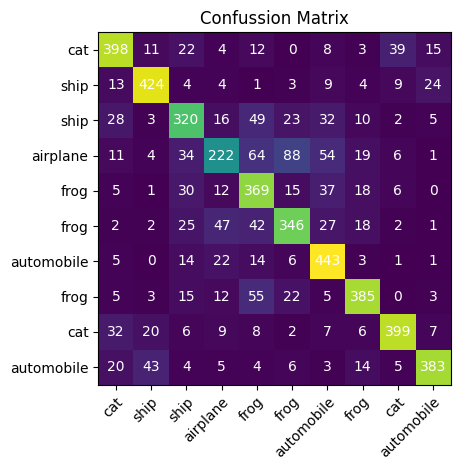

In [15]:
matrix, labels =  Compute_confusion_matrix(custom_model,test_data_loader,device)
Plot_confusion_matrix(matrix,labels,"Confussion Matrix")

### Review of Kernels


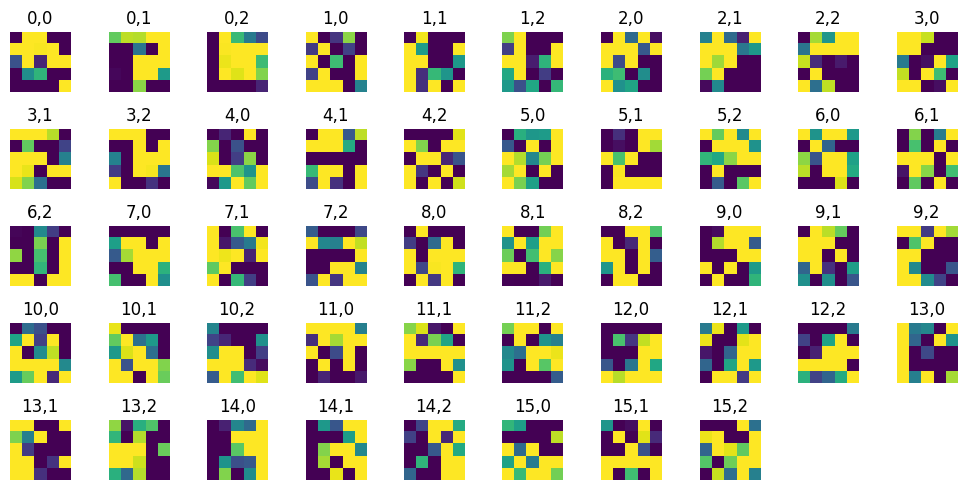

In [16]:
Get_convolutional_layer_weights(custom_model,0,False)

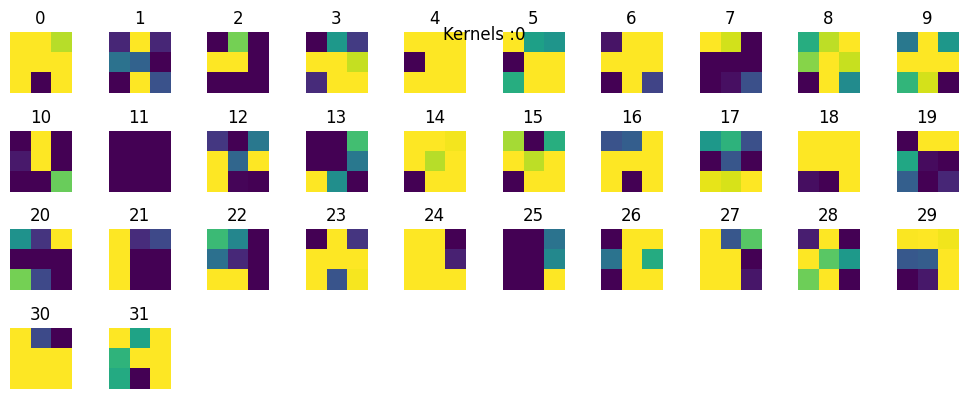

In [17]:
Get_convolutional_layer_weights(custom_model,3,True)

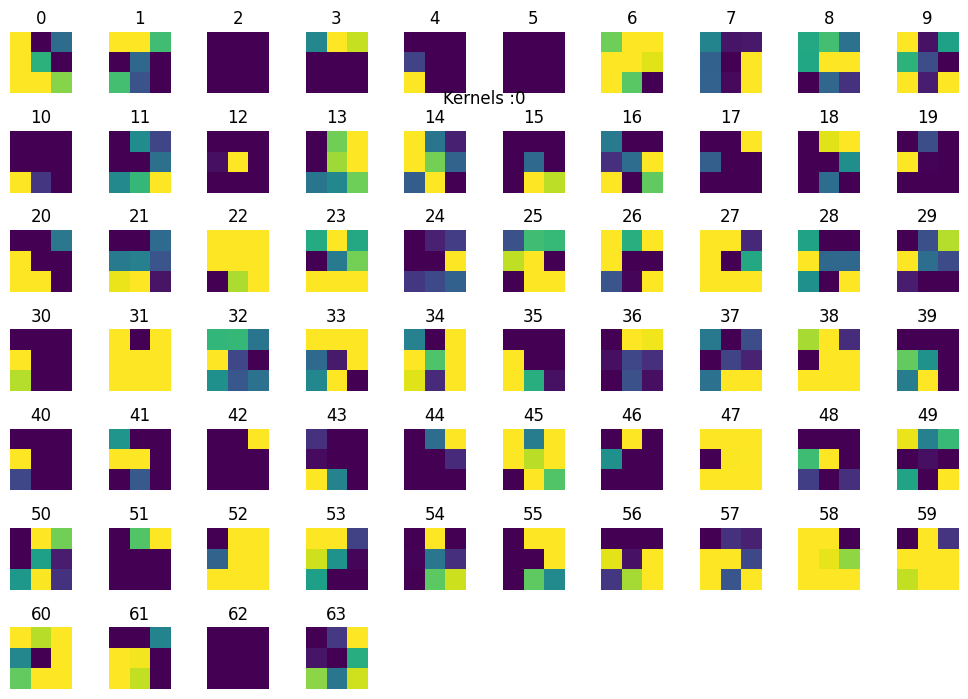

In [18]:
Get_convolutional_layer_weights(custom_model,6,True)

### Review of Integrated gradients and Occlussion

Target label: ship


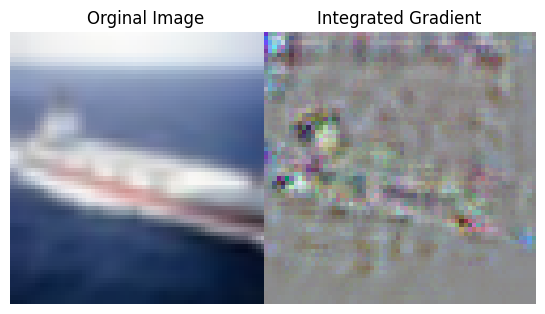

In [27]:
Get_integrated_gradient(custom_model,test_data_loader)

C:\Users\oswy2\Documents\Redes_Neuronales\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Target label: bird


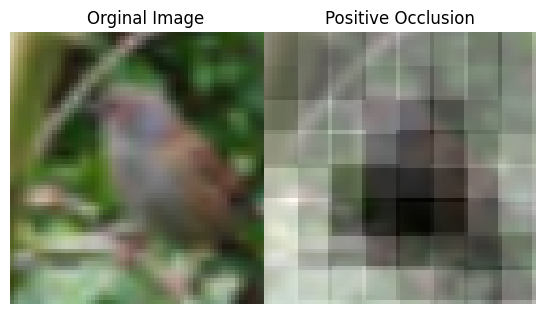

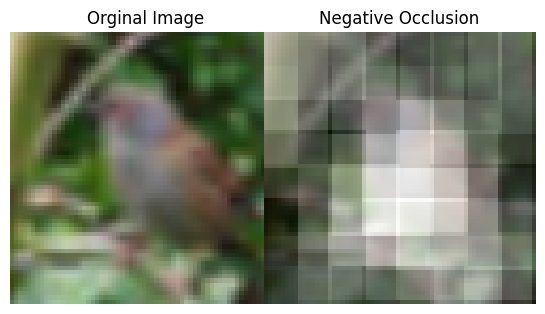

In [30]:
Get_occlusion(custom_model,test_data_loader)

### System specs

In [45]:
print(watermark())

Last updated: 2023-11-19T14:29:04.782721-04:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

Compiler    : MSC v.1935 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



### Libraries Version

In [46]:
print(watermark(packages="torch,torchvision,numpy,matplotlib,pydrive,captum,jupyter,torchview "))

torch      : 2.1.1+cu121
torchvision: 0.16.1+cu121
numpy      : 1.26.2
matplotlib : 3.8.2
pydrive    : 1.3.1
captum     : 0.6.0
jupyter    : 1.0.0
torchview  : not installed

